Two 5-dimensional Unimodal Gaussian Classes.
100 batches of 1900 instances



METHOD: Static knn as classifier
Execution time:  108.88984656203593
Average MCC:  0.374207068256
Average error: 30.9699
Average macro-F1: 0.6680122546887115
Average micro-F1: 0.6888
Average Accuracy:  69.0301
Standard Deviation:  21.5396584232
Variance:  463.95688499


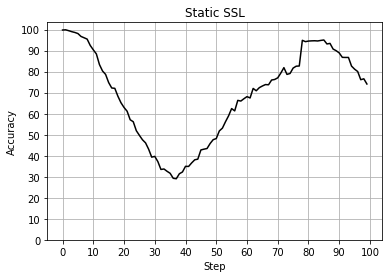

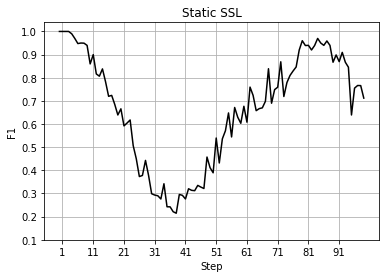

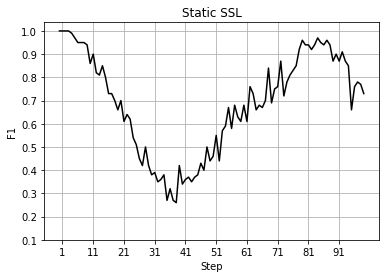




METHOD: Sliding knn as classifier


C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\raul\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:516: RuntimeWarning: invalid value encountered in double_scalars
  mcc = cov_ytyp / np.sqrt(var_yt * var_yp)


Execution time:  10.621276594063573
Average MCC:  0.613202796893
Average error: 20.1023
Average macro-F1: 0.7549708945059401
Average micro-F1: 0.8025999999999999
Average Accuracy:  79.8977
Standard Deviation:  19.4753759324
Variance:  379.29026771


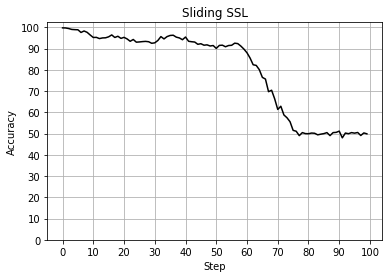

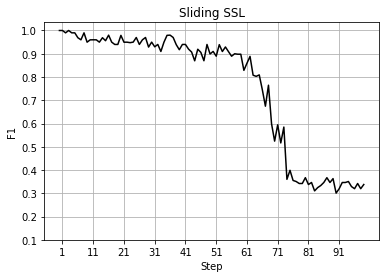

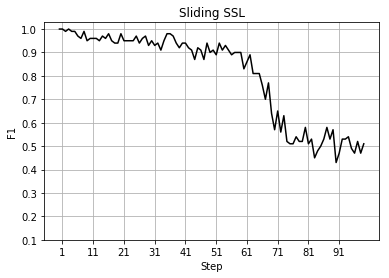




METHOD: Incremental knn as classifier
Execution time:  640.9909329418537
Average MCC:  0.40459770566
Average error: 30.6185
Average macro-F1: 0.6782636953387957
Average micro-F1: 0.6966000000000001
Average Accuracy:  69.3815
Standard Deviation:  18.8716946444
Variance:  356.14085875


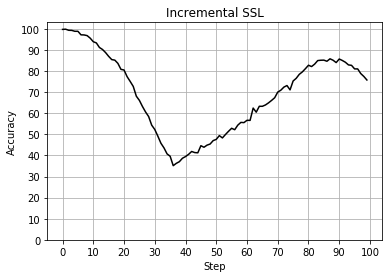

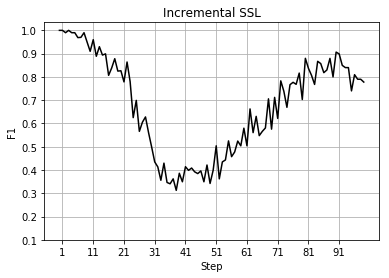

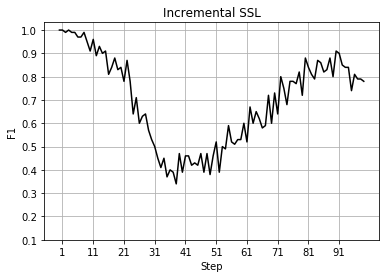




METHOD: knn as classifier and kde as core support extraction with cutting data method
Execution time:  36.068518293918714
Average MCC:  0.835879287063
Average error: 8.2063
Average macro-F1: 0.9151602043989746
Average micro-F1: 0.9161000000000002
Average Accuracy:  91.7937
Standard Deviation:  6.15591449827
Variance:  37.89528331


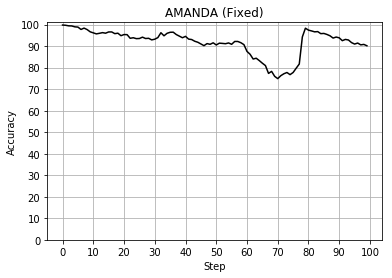

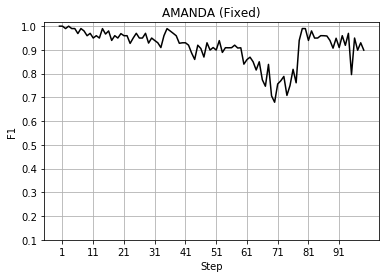

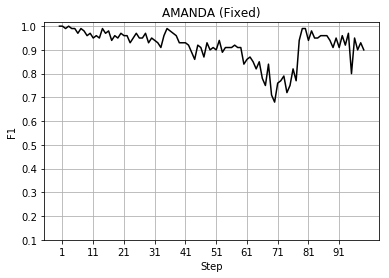




METHOD: knn as classifier and kde and Hellinger distance as dynamic CSE
Execution time:  28.71318450837157
Average MCC:  0.829793068893
Average error: 8.8294
Average macro-F1: 0.9092928763626793
Average micro-F1: 0.9109999999999998
Average Accuracy:  91.1706
Standard Deviation:  7.02205195367
Variance:  49.30921364


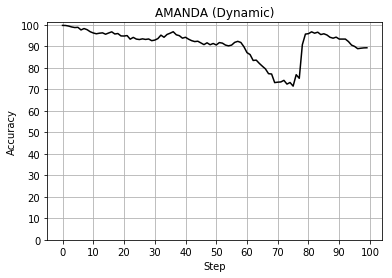

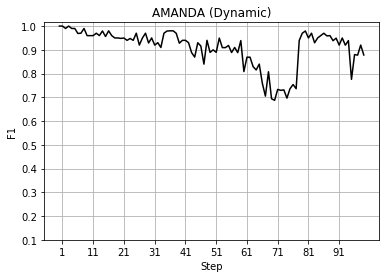

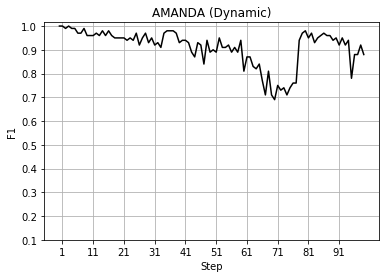




METHOD: None as classifier and GMM with BIC and Mahalanobis as core support extraction
Execution time:  69.4395838263373
Average MCC:  0.545009124806
Average error: 22.9587
Average macro-F1: 0.7073523560026582
Average micro-F1: 0.7722999999999999
Average Accuracy:  77.0413
Standard Deviation:  21.4786416077
Variance:  461.33204531


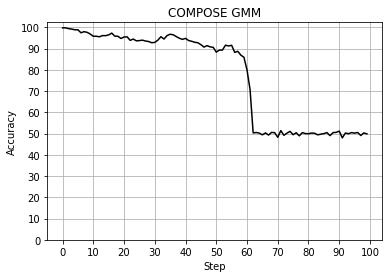

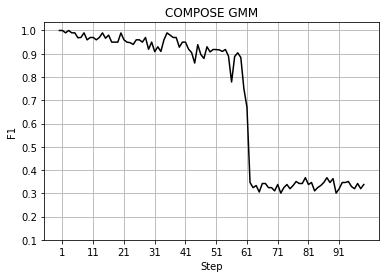

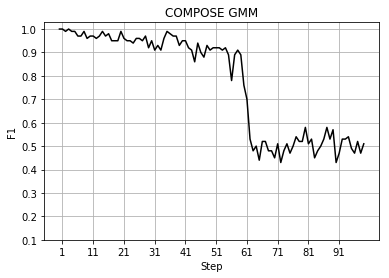




Method: Level IW
Execution time:  69.4395838263373
Average MCC:  0.00846440678253
Average macro-F1: 0.5019007957521722
Average micro-F1: 0.5048
Average Accuracy:  79.18316
Standard Deviation:  20.2756560349
Variance:  411.102227645


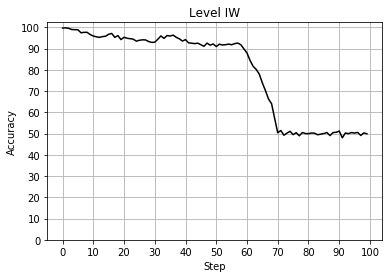

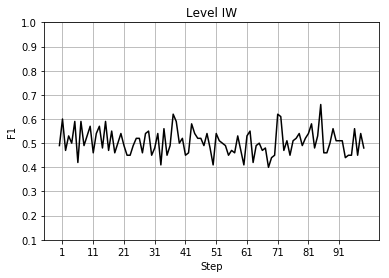

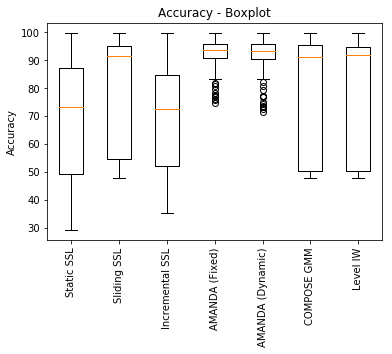

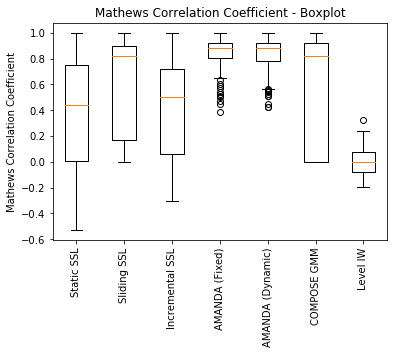

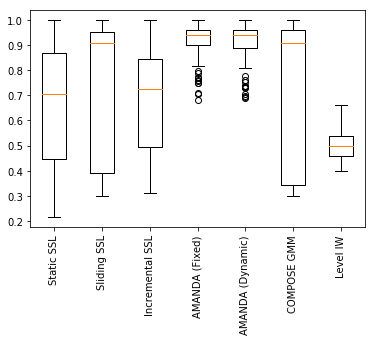

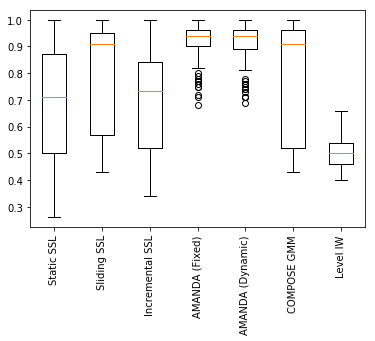

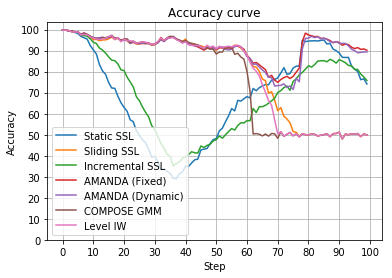

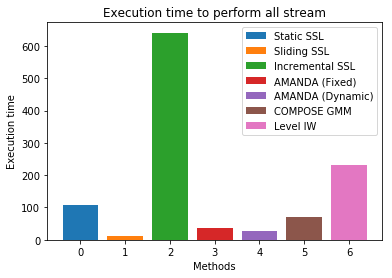

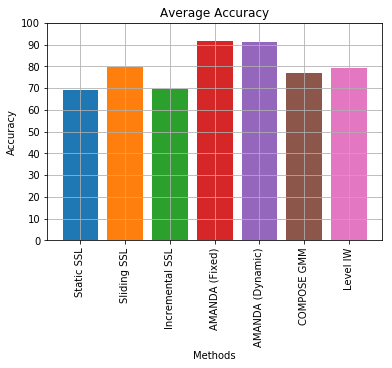

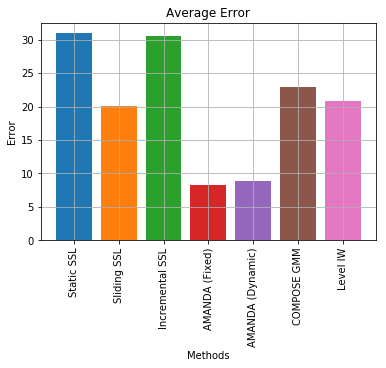

Error reduction: 15.7432772081
Error reduction: 0.50905329704
Error reduction: 32.9763393071
Error reduction: 32.0736895934
Error reduction: 11.6053721493
Error reduction: 14.7081635403


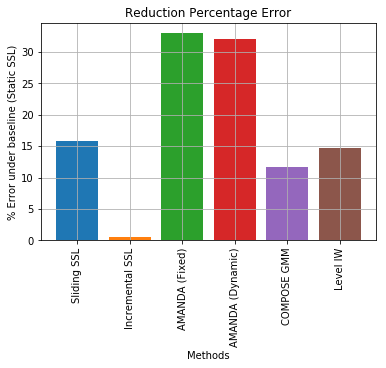

In [1]:
import sys
import os
from pathlib import Path
os.chdir(Path(os.getcwd()).resolve().parents[3])

import setup
from methods import runExperiments
from methods import static_classifier
from methods import amanda_dynamic
from methods import amanda_fixed
from methods import incremental_LN
from methods import deslizante_LN
from methods import compose_gmm_version


class Experiment():
     def __init__(self, method, K=None, excludingPercentage=None, densityFunction=None, clfName=None):
        self.method = method
        self.clfName = clfName
        self.densityFunction=densityFunction
        self.excludingPercentage = excludingPercentage
        self.K_variation = K


def loadLevelResults(path, sep, key, steps):
    originalAccs, F1s, time = setup.loadLevelIwBoxplotResults(path, sep)
    predictions = F1s[key]
    predictions = [ predictions[i::steps] for i in range(steps) ]
    
    return predictions, originalAccs[key], time[key]


def main():
    experiments = {}
    is_windows = sys.platform.startswith('win')
    sep = '\\'

    if is_windows == False:
        sep = '/'

    path = os.getcwd()+sep+'data'+sep
    
    # SETTINGS
    sslClassifier = 'knn' # lp = label propagation, rf = random forests, cl = cluster and label, knn = k-nn, svm = svm
    steps = 100
    poolSize = None
    isBatchMode = True # False = Stream
    isBinaryClassification = True
    isImbalanced = False
    externalResults = []
    
    # Load dataset
    dataValues, dataLabels, description = setup.loadUG_2C_5D(path, sep)
    
    # Only 5% of initial labeled data - Extreme verification latency scenario
    labeledData = int(0.05*len(dataLabels))

    # Static SSL
    experiments[0] = Experiment(static_classifier, 11, clfName=sslClassifier)
    
    # Sliding SSL
    experiments[1] = Experiment(deslizante_LN, 11, clfName=sslClassifier)
    
    # Incremental SSL
    experiments[2] = Experiment(incremental_LN, 11, clfName=sslClassifier)
    
    # Proposed Method 1 (AMANDA - Fixed core extraction percentage)
    experiments[3] = Experiment(amanda_fixed, 11, 0.75, "kde", sslClassifier)

    # Proposed method 2 (AMANDA - Dynamic core extraction percentage)
    experiments[4] = Experiment(amanda_dynamic, 11, None, "kde", sslClassifier)

    # COMPOSE GMM (Python version)
    experiments[5] = Experiment(compose_gmm_version, 11)
    
    # levelIw matlab results
    predictionsLevelIw, originalAccsLevelIw, timeLevelIw = loadLevelResults(path, sep, 'UG_2C_5D', steps)
    externalResults.append({"name":"Level IW", "predictions":predictionsLevelIw, "accuracies":originalAccsLevelIw, "time":timeLevelIw})
    
    # Run experiments
    runExperiments.run(dataValues, dataLabels, description, isBinaryClassification, isImbalanced, 
                       experiments, steps, labeledData, isBatchMode, poolSize, externalResults)
    

if __name__ == "__main__":
    main()